In [27]:
import pandas as pd
import boto3
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

plt.style.use('ggplot')

In [2]:
# Define path for storage
data_path = os.getcwd() + "/data/"
if not os.path.exists(data_path):
    os.makedirs(data_path)

# Connection to AWS S3 and Download datasets

In [46]:
def list_files_in_bucket(bucket_name: str):
    try:
        response = s3_client.list_objects_v2(Bucket=bucket_name)
        if 'Contents' in response:
            return [item['Key'] for item in response['Contents']]
        else:
            return []
    except Exception as e:
        print(f"Error accessing bucket {bucket_name}: {e}")
        return []
    


def download_file_from_s3(bucket_name: str, s3_key: str, local_file_name: str):
    try:
        s3_client.download_file(bucket_name, s3_key, local_file_name)
        print(f"File downloaded successfully: {local_file_name}")
    except Exception as e:
        print(f"Error downloading file: {e}")

In [47]:
# AWS Credentials
aws_access_key_id = key_id
aws_secret_access_key = key_pass

# Create an S3 client
s3_client = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key
)

In [51]:
bucket_name = 'zrive-ds-data'

# Get files from s3 bucket in "sampled-datasets"
files = [x for x in list_files_in_bucket(bucket_name) if "sampled-datasets" in x]

for file in files:
    download_file_from_s3(bucket_name = bucket_name, s3_key = file, local_file_name = data_path +  file.split('/')[-2])

File downloaded successfully: /home/agrande/zrive-ds/src/module_2/data/sampled-datasets
File downloaded successfully: /home/agrande/zrive-ds/src/module_2/data/sampled-datasets
File downloaded successfully: /home/agrande/zrive-ds/src/module_2/data/sampled-datasets
File downloaded successfully: /home/agrande/zrive-ds/src/module_2/data/sampled-datasets
File downloaded successfully: /home/agrande/zrive-ds/src/module_2/data/sampled-datasets


In [56]:
download_file_from_s3(bucket_name = bucket_name, s3_key = 'groceries/box_builder_dataset/feature_frame.csv', local_file_name = data_path + 'feature_frame.csv')

File downloaded successfully: /home/agrande/zrive-ds/src/module_2/data/feature_frame.csv


# Exploratory Data Analysis

In [3]:
df_orders = pd.read_parquet(data_path + 'orders.parquet')
df_regulars = pd.read_parquet(data_path + 'regulars.parquet')
df_abandoned_carts = pd.read_parquet(data_path + 'abandoned_carts.parquet')
df_inventory = pd.read_parquet(data_path + 'inventory.parquet')
df_users = pd.read_parquet(data_path + 'users.parquet')


In [4]:
df_orders.sort_values(by='id').head(3)

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."


In [5]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [6]:
df_regulars.head(3)

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03


In [7]:
df_regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [8]:
df_abandoned_carts.head(3)

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."


In [9]:
df_abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [10]:
df_inventory.head(3)

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]


In [11]:
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [12]:
df_users.head(3)

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [13]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


To get a dataframe with all info I'll explode the list columns and join dfs by the right keys

### Concat in a single dataframe orders and  

In [44]:
df_abandoned_carts['is_abandoned_cart'] = 1


df_all_orders = pd.concat(
    [df_orders.explode('ordered_items').rename(columns={"id": "order_id", "ordered_items": "variant_id"}),
    df_abandoned_carts.explode('variant_id').rename(columns={"id": "order_id", "ordered_items": "variant_id"})]
    ,axis = 0
).sort_values(by='created_at')
'''
# Join with regular orders
df_regulars = df_regulars.rename(columns={"created_at": "regular_order_created_at"})
df_regulars['is_regular_order'] = 1


df_all_orders = pd.merge(left=df_all_orders, right=df_regulars, 
                    how='left', 
                    left_on=['user_id', 'variant_id'], 
                    right_on=['user_id', 'variant_id'])


mask = df_all_orders['regular_order_created_at'].dt.date >= df_all_orders['created_at'].dt.date
df_all_orders['regular_order_created_at'][mask] = pd.NaT
df_all_orders['is_regular_order'][mask] = 0
'''
# Join with inventory
df_all_orders = pd.merge(left=df_all_orders, right=df_inventory, 
                    how='left', left_on=['variant_id'], right_on=['variant_id'])

# Join with users
df_users = df_users.rename(columns={"first_ordered_at": "user_first_ordered_at"})
df_all_orders = pd.merge(left=df_all_orders, right=df_users, 
                    how='left', left_on=['user_id'], right_on=['user_id'])

df_all_orders
#me quedan df_users, df_inventory, 

,order_id,user_id,created_at,order_date,user_order_seq,variant_id,is_abandoned_cart,price,compare_at_price,vendor,product_type,tags,user_segment,user_nuts1,user_first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618849693828,NaN,NaN,NaN,NaN,NaN,NaN,Proposition,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4.0,4.0,0.0,0.0,0.0
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618997379204,NaN,NaN,NaN,NaN,NaN,NaN,Proposition,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4.0,4.0,0.0,0.0,0.0
2,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618979389572,NaN,NaN,NaN,NaN,NaN,NaN,Proposition,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4.0,4.0,0.0,0.0,0.0
3,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618967560324,NaN,NaN,NaN,NaN,NaN,NaN,Proposition,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4.0,4.0,0.0,0.0,0.0
4,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618967036036,NaN,NaN,NaN,NaN,NaN,NaN,Proposition,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138822,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3.0,34537169453188,NaN,0.99,1.38,whiskas,cat-food,[cat-treats],Top Up,UKD,2022-01-02 00:39:26,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
138823,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3.0,39368665432196,NaN,4.99,5.09,whiskas,cat-food,[wet-cat-food],Top Up,UKD,2022-01-02 00:39:26,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
138824,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3.0,39403033428100,NaN,3.29,3.40,napolina,tins-packaged-foods,"[beans-pulses-lentils, discontinue, gluten-fre...",Top Up,UKD,2022-01-02 00:39:26,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
138825,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3.0,39830155034756,NaN,4.49,9.00,cif,cleaning-products,"[kitchen-oven-cleaner, refills]",Top Up,UKD,2022-01-02 00:39:26,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [33]:
df_all_orders.head(50)

,order_id,user_id,created_at,order_date,user_order_seq,variant_id,is_abandoned_cart,regular_order_created_at,is_regular_order
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618849693828,NaN,2020-04-30 13:09:27,1.0
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618997379204,NaN,2020-04-30 13:09:27,1.0
2,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618979389572,NaN,2020-04-30 13:09:27,1.0
3,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618967560324,NaN,2020-04-30 13:09:27,1.0
4,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618967036036,NaN,2020-04-30 13:09:27,1.0
5,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618956746884,NaN,2020-04-30 13:09:27,1.0
6,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618956746884,NaN,2020-04-30 13:09:27,1.0
7,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618981421188,NaN,2020-04-30 13:09:27,1.0
8,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618923061380,NaN,2020-04-30 13:09:27,1.0
9,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618907005060,NaN,2020-04-30 13:09:27,1.0


In [20]:
df_regulars = df_regulars.rename(columns={"created_at": "regular_order_created_at"})
df_regulars['is_regular_order'] = 1
df_regulars.head()

,user_id,variant_id,regular_order_created_at,is_regular_order
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,1
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,1
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,1
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,1
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,1


In [22]:
df_all_orders

,order_id,user_id,created_at,order_date,user_order_seq,variant_id,is_abandoned_cart
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618849693828,NaN
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618997379204,NaN
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618979389572,NaN
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618967560324,NaN
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1.0,33618967036036,NaN
...,...,...,...,...,...,...,...
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3.0,34537169453188,NaN
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3.0,39368665432196,NaN
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3.0,39403033428100,NaN
64538,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3.0,39830155034756,NaN


## Potential questions to the data:

Which user makes the bigger number of orders?
Is there seasonality in user orders? -> How many orders per month?
How many item (products) per order? 

Which are the products ordered regularly? and product type?
Which customers order products regularly?

How many abandoned carts per user?
Is the seasonality in abandoned carts? -> How many abandoned carts per month?

% discount between "compare_at_price" and "price"?
Analyse product_types per vendors
How many distinct vendors?
How many distinct products?
How many distinct product types?



**What can I build from this data?**

- A product recommender per user
- Address problem of abandoned carts
- 



### Orders

In [159]:
df_orders = df_orders.explode('ordered_items').rename(columns={"id": "order_id", "ordered_items": "variant_id"})
df_orders = df_orders.merge(df_inventory, how='left', left_on=['variant_id'], right_on=['variant_id'])

In [ ]:
df_orders.tail()

,order_id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
107953,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,34537169453188,0.99,1.38,whiskas,cat-food,[cat-treats]
107954,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39368665432196,4.99,5.09,whiskas,cat-food,[wet-cat-food]
107955,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39403033428100,3.29,3.40,napolina,tins-packaged-foods,"[beans-pulses-lentils, discontinue, gluten-fre..."
107956,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39459281272964,4.49,9.00,cif,cleaning-products,"[bathroom-limescale-cleaner, refills]"
107957,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39830155034756,4.49,9.00,cif,cleaning-products,"[kitchen-oven-cleaner, refills]"


In [136]:
def plot_line_chart(df: pd.DataFrame, x: str, y: str, title: str, x_label: str, y_label: str):

    plt.figure(figsize=(12, 6))
    plt.plot(df[x], df[y])  
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.xticks(rotation=45)  
    plt.tight_layout()  

    plt.show()

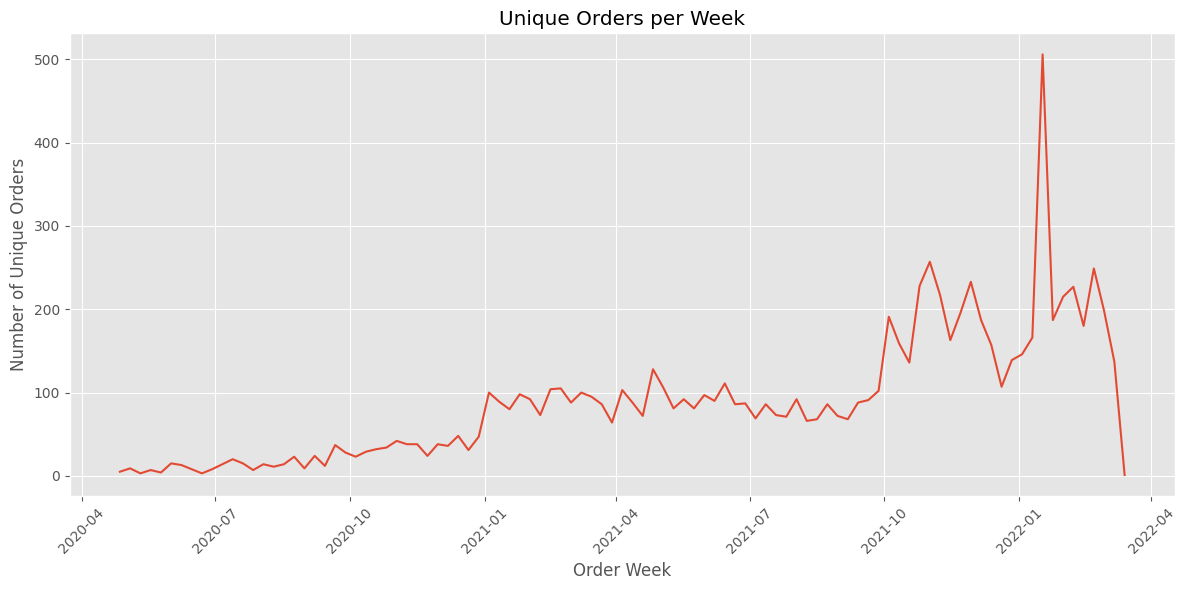

In [148]:
# Sales evolution
df_orders['order_week'] = df_orders['order_date'].dt.to_period('W').dt.to_timestamp()


order_counts = df_orders.groupby('order_week')['order_id'].nunique().reset_index().rename(columns={"order_id": "count_orders"})

plot_line_chart(order_counts, x='order_week', y='count_orders', 
                title='Unique Orders per Week',x_label='Order Week', y_label='Number of Unique Orders')


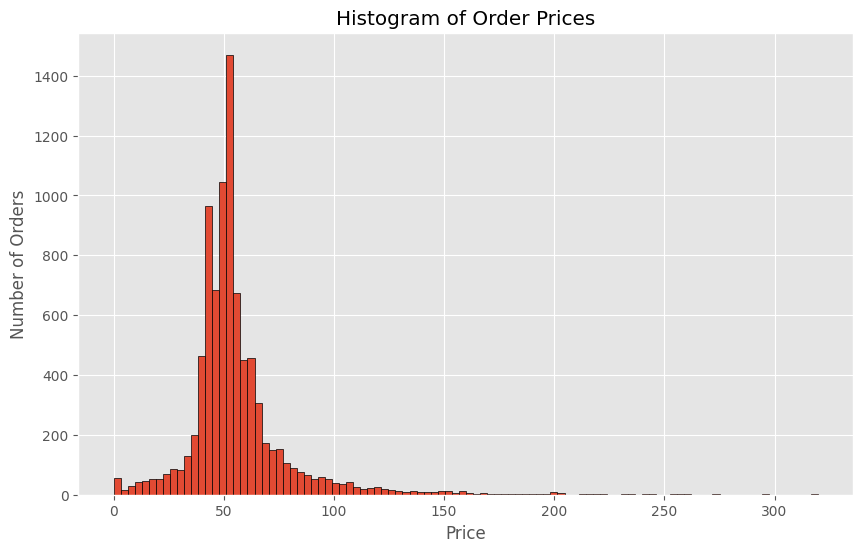

In [165]:
# Most frequent cart total price
order_total_price = df_orders.groupby('order_id')['price'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.hist(order_total_price['price'], bins=100, edgecolor='black')
plt.title('Histogram of Order Prices')
plt.xlabel('Price')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [166]:
# Most Popular Products
popular_products = df_orders[['variant_id', 'product_type', 'vendor', 'price']].value_counts().reset_index().head(10)
popular_products

,variant_id,product_type,vendor,price,count
0,34081589887108,long-life-milk-substitutes,oatly,10.79,4487
1,34284951863428,toilet-roll-kitchen-roll-tissue,plenty,3.69,1133
2,34284950356100,dishwashing,fairy,1.99,954
3,34370361229444,toilet-roll-kitchen-roll-tissue,whogivesacrap,4.99,939
4,33826465153156,tins-packaged-foods,clearspring,1.89,884
5,34284949766276,toilet-roll-kitchen-roll-tissue,andrex,8.49,838
6,33667268083844,washing-powder,persil,15.99,683
7,34284950454404,fabric-softener-freshener,lenor,3.99,683
8,34037939372164,toilet-roll-kitchen-roll-tissue,andrex,4.99,663
9,34081589461124,long-life-milk-substitutes,oatly,8.99,642


In [167]:
# Most frequent users
df_orders[['user_id']].value_counts().reset_index().head(10)

,user_id,count
0,a655b992a3ee5f6aa9f5ab5662c4befac1fdc45c99885b...,499
1,b9452236b95ed2b60d18404a1e8b5aa4652bc3c4518a6e...,478
2,1296e1e72f7f43ff28d7d285f880ad4d213fa8139233c7...,434
3,751784f6b91585570748d781931f56e3ca71fc92bca034...,389
4,425c2b5dc3f35d7e690d26b2028201385d622599043c4d...,350
5,27c2c38327ba83867c6291ee6bd0c35548edd256ed51c9...,349
6,04e9d7967f4dfd7d40175f130f1c80f62204ff697df92d...,335
7,c1e8d257fc94a13b84dcf4e21e05a5872cd9c1683f6647...,320
8,1dacfd2a360677052d8605f843ae410dd23b0ddb7f506c...,297
9,279ea023f07ae59fa0b4244f4ef518e43677f6ab876572...,295


In [173]:
# User spending the highest amounts
df_orders.groupby('user_id')['price'].sum().reset_index().sort_values(by='price', ascending=False).head(10)

,user_id,price
84,04e9d7967f4dfd7d40175f130f1c80f62204ff697df92d...,1969.99
3663,ba7176c5f870cd86e51ecc4375e0becc8cc305845e70b9...,1781.73
3267,a655b992a3ee5f6aa9f5ab5662c4befac1fdc45c99885b...,1756.21
2280,751784f6b91585570748d781931f56e3ca71fc92bca034...,1738.17
1268,425c2b5dc3f35d7e690d26b2028201385d622599043c4d...,1617.47
3825,c1e8d257fc94a13b84dcf4e21e05a5872cd9c1683f6647...,1537.11
556,1dacfd2a360677052d8605f843ae410dd23b0ddb7f506c...,1485.52
917,300362d588ff3c7d720d58b04281edc30f1f74b2b86af2...,1455.09
3640,b9452236b95ed2b60d18404a1e8b5aa4652bc3c4518a6e...,1402.88
319,114e78a8909ad3f9d481e66563998301eff9e7cd1b2d00...,1320.23


# EDA given df

In [10]:
# The CSV file was killing my Kernel so I converted it into parquet

# df = pd.read_csv(data_path + 'feature_frame.csv')
df = pd.read_parquet(data_path + 'feature_frame.parquet')

In [11]:
df.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,vendor,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05,2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05,4,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.000000,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06,2,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06,3,0.0,0.0,0.0,0.0,0.0,0.081052,0.053512,clearspring,0.038462,2.0,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   variant_id                        int64         
 1   product_type                      object        
 2   order_id                          int64         
 3   user_id                           int64         
 4   created_at                        datetime64[us]
 5   order_date                        datetime64[us]
 6   user_order_seq                    int32         
 7   outcome                           float64       
 8   ordered_before                    float64       
 9   abandoned_before                  float64       
 10  active_snoozed                    float64       
 11  set_as_regular                    float64       
 12  normalised_price                  float64       
 13  discount_pct                      float64       
 14  vendor            

In [6]:
df.describe()

,variant_id,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
count,2.880549e+06,2.880549e+06,2.880549e+06,2880549,2880549,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.401250e+13,2.978388e+12,3.750025e+12,2021-01-13 02:56:12.506719,2021-01-12 12:11:14.646395,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,1.272808e-01,1.862744e-01,1.070302e-02,2.017627e+00,5.492182e-02,3.538562e-03,5.134091e-02,2.072549e+00,3.312961e+01,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01
min,3.361529e+13,2.807986e+12,3.046041e+12,2020-10-05 16:46:19,2020-10-05 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599349e-02,-4.016064e-02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00
25%,3.380354e+13,2.875152e+12,3.745901e+12,2020-12-16 21:06:58,2020-12-16 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.394416e-02,8.462238e-02,1.628664e-03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01
50%,3.397325e+13,2.902856e+12,3.812775e+12,2021-01-22 07:36:39,2021-01-22 00:00:00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.105178e-02,1.169176e-01,6.284368e-03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01
75%,3.428495e+13,2.922034e+12,3.874925e+12,2021-02-14 18:19:46,2021-02-14 00:00:00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.352670e-01,2.234637e-01,1.418440e-02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01
max,3.454300e+13,3.643302e+12,5.029635e+12,2021-03-03 14:42:05,2021-03-03 00:00:00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.325301e+00,4.254386e-01,5.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.480000e+02,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01
std,2.786246e+11,2.446292e+11,1.775710e+11,NaN,NaN,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,1.268378e-01,1.934480e-01,1.663389e-02,2.098915e-01,3.276586e-01,5.938048e-02,3.013646e-01,3.943659e-01,3.707162e+00,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00


In [12]:
info_cols = ['varian_id', 'order_id', 'user_id', 'created_at', 'order_date']
label_col = ['outcome']
features_cols = [col for col in df.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

In [13]:
df[label_col].value_counts()

outcome
0.0        2847317
1.0          33232
Name: count, dtype: int64

In [18]:
for col in binary_cols:
    print(f"Value counts {col}: {df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value: {df.groupby(col)['outcome'].mean().to_dict()}")
    print('----')

Value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value: {0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
----
Value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value: {0.0: 0.011106039542947498, 1.0: 0.717948717948718}
----
Value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value: {0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
----
Value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value: {0.0: 0.010668992259135854, 1.0: 0.24971308339709258}
----


In [31]:
# Correlation matrix

columns = numerical_cols + label_col

def plot_correlation_matrix(df: pd.DataFrame, columns: list):
    # Compute the correlation matrix
    corr = df[columns].corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots (figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette (230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

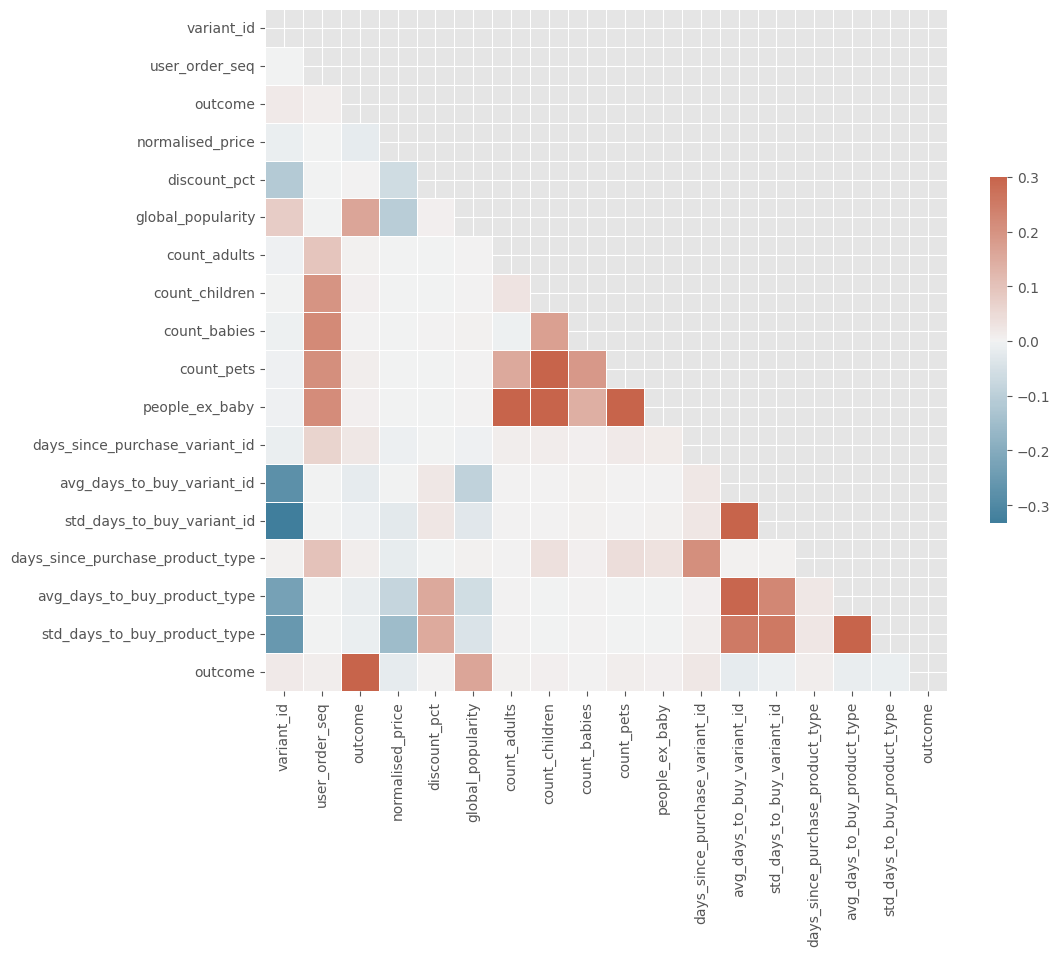

In [33]:
plot_correlation_matrix(df, columns)

In [36]:
def plot_distribution_numerical_columns_and_binary_outcome(df: pd.DataFrame, numerical_cols: list, outcome: str):
    cols = 3
    rows = int(np.ceil(len (numerical_cols) / cols))
    fig, ax = plt.subplots (rows, cols, figsize=(20, 5*rows))
    ax = ax. flatten()

    for i, col in enumerate(numerical_cols):
        sns.kdeplot (df.loc [lambda x: x.outcome == 0, col], label='0', ax=ax [i])
        sns.kdeplot (df.loc [ lambda x: x.outcome == 1, col], label='1', ax=ax[i])
        ax[i].set_title(col)

    ax [0]. legend ()

    plt.tight_layout()

/tmp/ipykernel_761/2016413241.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot (df.loc [lambda x: x.outcome == 0, col], label='0', ax=ax [i])
/tmp/ipykernel_761/2016413241.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot (df.loc [ lambda x: x.outcome == 1, col], label='1', ax=ax[i])


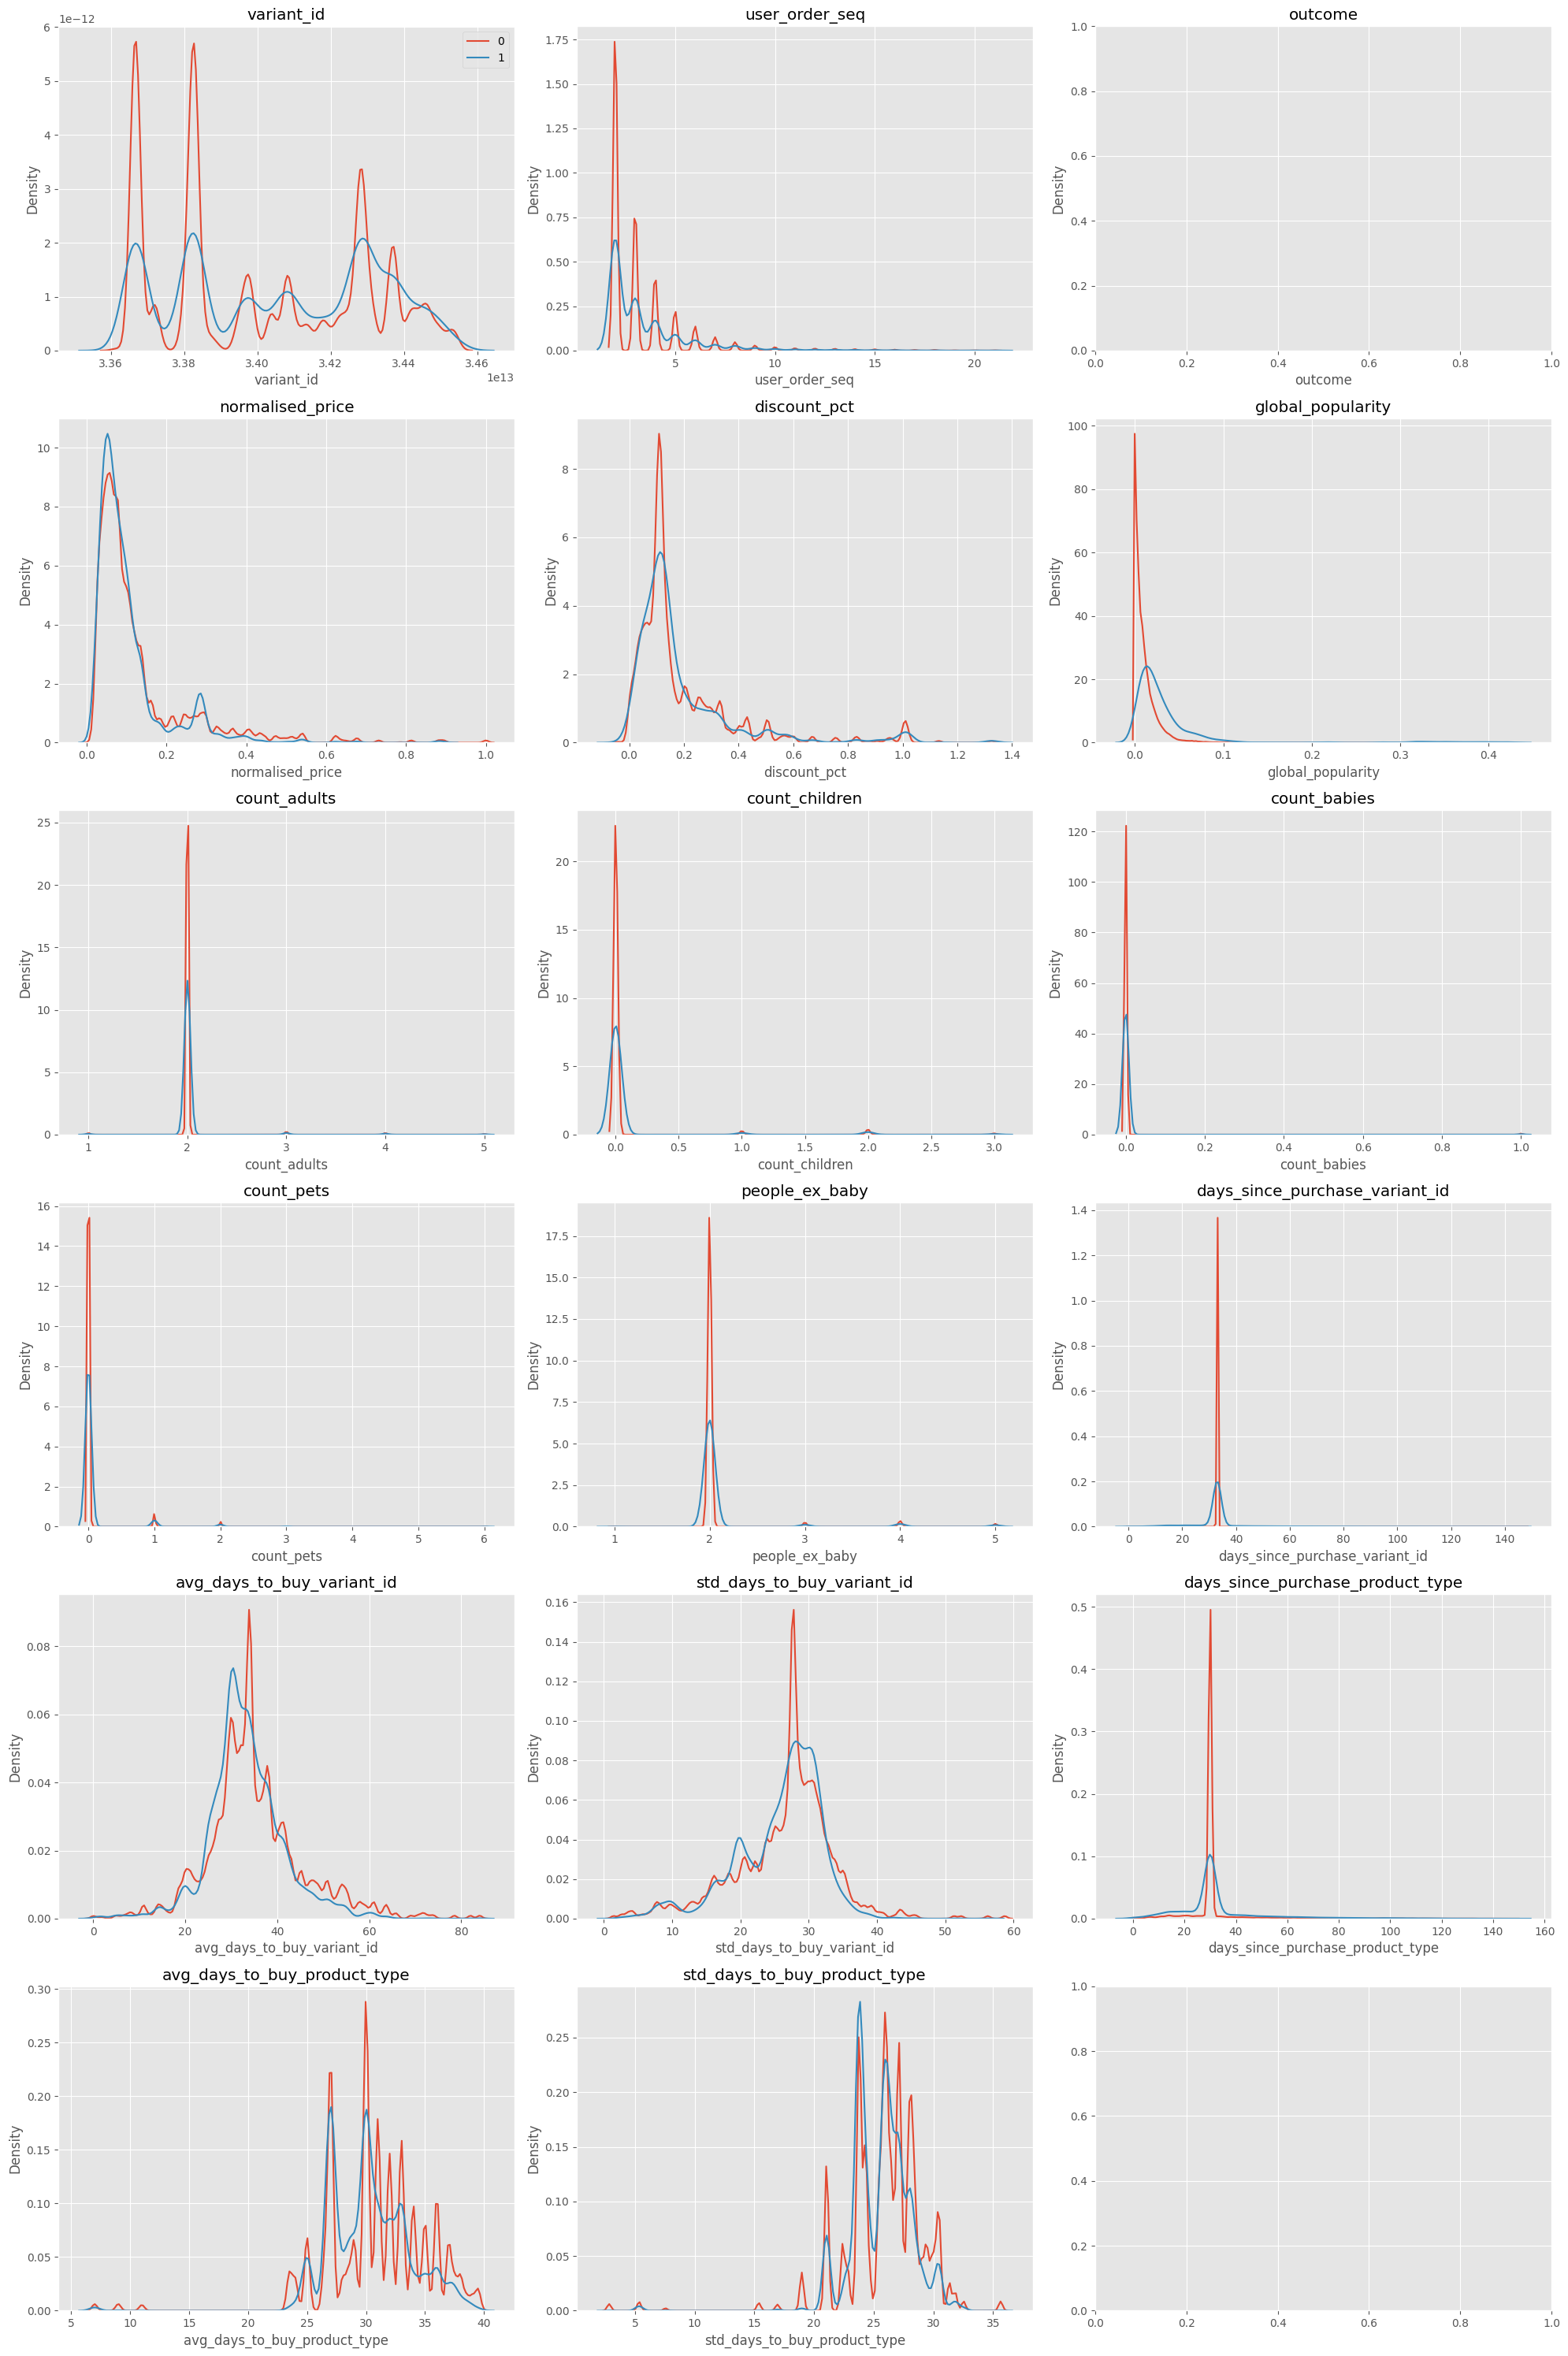

In [38]:
plot_distribution_numerical_columns_and_binary_outcome(df, numerical_cols, label_col)

In [40]:
df[categorical_cols].describe()

,product_type,vendor
count,2880549,2880549
unique,62,264
top,tinspackagedfoods,biona
freq,226474,146828


: 

# TEST

In [152]:
prod = df_orders[['variant_id', 'product_type', 'vendor']].value_counts()

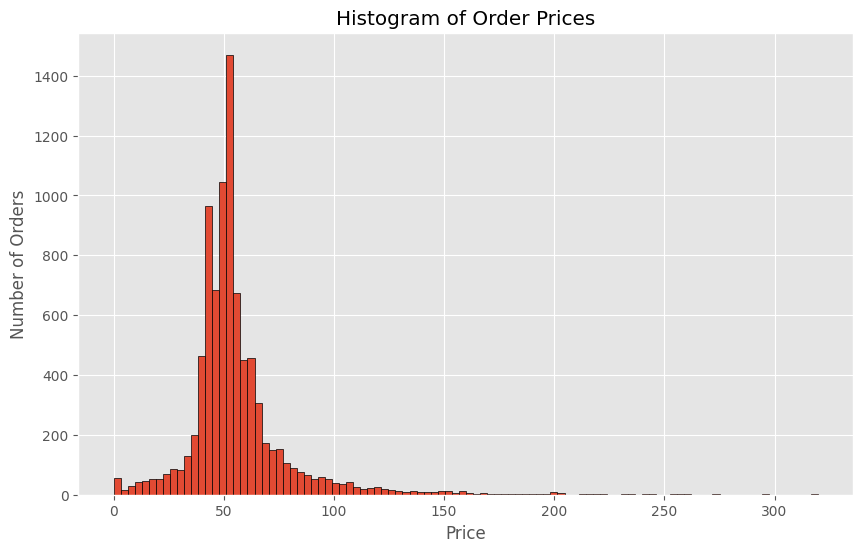

In [147]:
plt.figure(figsize=(10,6))
plt.hist(order_total_price['price'], bins=100, edgecolor='black')
plt.title('Histogram of Order Prices')
plt.xlabel('Price')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()